In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

In [3]:
import sklearn.datasets as datasets

d:\python3.6.8\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [4]:
from sklearn.metrics import roc_curve,auc

In [5]:
from sklearn.model_selection import KFold,StratifiedKFold

In [11]:
from sklearn.model_selection import train_test_split

In [6]:
iris = datasets.load_iris()

X = iris['data']

y = iris['target']

In [9]:
cond = y!=2

X = X[cond]

y = y[cond]

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# a是数据
a = np.random.randint(50,size = (8,2))
# b是目标值
b = np.array([0,0,1,0,1,1,1,0])
display(a,b)

array([[33, 38],
       [15,  7],
       [48,  7],
       [45, 45],
       [43, 37],
       [44, 41],
       [36, 15],
       [ 3, 16]])

array([0, 0, 1, 0, 1, 1, 1, 0])

In [15]:
kFold = KFold(n_splits=4)


KFold(n_splits=4, random_state=None, shuffle=False)

In [17]:
for train,test in kFold.split(a,b):
    print(train,test)

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [18]:
sKFold = StratifiedKFold(n_splits=4)

In [19]:
for train,test in sKFold.split(a,b):
    print(train,test)

[1 3 4 5 6 7] [0 2]
[0 2 3 5 6 7] [1 4]
[0 1 2 4 6 7] [3 5]
[0 1 2 3 4 5] [6 7]


In [20]:
sKFold = StratifiedKFold(6)

In [24]:
import warnings

In [25]:
warnings.filterwarnings('ignore')

In [26]:
lg = LogisticRegression()

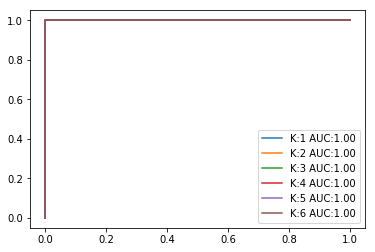

In [28]:

num = 1
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    lg.fit(X_train,y_train)
    
    prob = lg.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    auc_ = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1
    
plt.legend()

In [29]:
svc = SVC(probability=True)

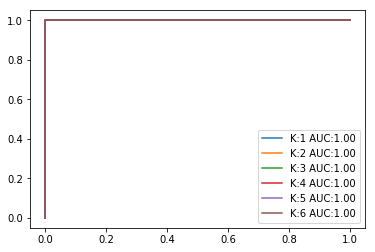

In [30]:

num = 1
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    svc.fit(X_train,y_train)
    
    prob = svc.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    auc_ = auc(fpr,tpr)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1
    
plt.legend()

In [31]:
X.shape

(100, 4)

In [32]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
X = np.concatenate([X,np.random.randn(100,800)],axis = 1)
X.shape

(100, 804)

In [34]:
X

array([[ 5.1       ,  3.5       ,  1.4       , ...,  0.32645937,
        -0.48464551,  0.04813055],
       [ 4.9       ,  3.        ,  1.4       , ..., -2.25637119,
        -0.53800445,  0.76568264],
       [ 4.7       ,  3.2       ,  1.3       , ..., -1.38736702,
        -0.23343432, -0.71001265],
       ...,
       [ 6.2       ,  2.9       ,  4.3       , ..., -1.70377527,
         0.42830898, -1.45508981],
       [ 5.1       ,  2.5       ,  3.        , ..., -0.11611907,
        -0.73315524, -2.04606322],
       [ 5.7       ,  2.8       ,  4.1       , ...,  1.67305707,
        -0.32366911, -1.16052525]])

In [47]:
# 线性插值
from scipy import interp

平均的auc：0.77


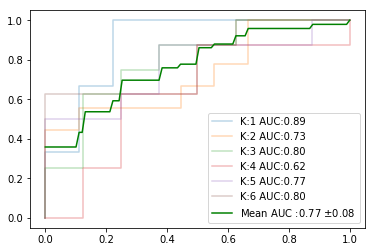

In [72]:
lg = LogisticRegression()
num = 1
aucs = []
fprs = np.linspace(0,1,100)

tprs = []
for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    lg.fit(X_train,y_train)
    
    prob = lg.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    
    tprs.append(interp(fprs,fpr,tpr))
    
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,alpha = 0.3,label = 'K:%d AUC:%0.2f'%(num,auc_))
    num +=1
    

# tprs中6个数据，求平均值
tprs = np.mean(tprs,axis = 0)

# 平均的tprs，和fprs，求解平均的auc值
auc_mean = auc(fprs,tprs)
std = np.std(aucs)
plt.plot(fprs,tprs,label = 'Mean AUC :%0.2f $\pm$%0.2f'%(auc_mean,std),color = 'green')
print('平均的auc：%0.2f'%(np.mean(aucs)))
plt.legend()

In [51]:
np.mean(tprs,axis = 0)

array([0.3587963 , 0.3587963 , 0.3587963 , 0.3587963 , 0.3587963 ,
       0.3587963 , 0.3587963 , 0.3587963 , 0.3587963 , 0.3587963 ,
       0.3587963 , 0.43287037, 0.43287037, 0.53703704, 0.53703704,
       0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.53703704,
       0.53703704, 0.53703704, 0.59259259, 0.59259259, 0.59259259,
       0.69675926, 0.69675926, 0.69675926, 0.69675926, 0.69675926,
       0.69675926, 0.69675926, 0.69675926, 0.69675926, 0.69675926,
       0.69675926, 0.69675926, 0.69675926, 0.75925926, 0.75925926,
       0.75925926, 0.75925926, 0.75925926, 0.75925926, 0.77777778,
       0.77777778, 0.77777778, 0.77777778, 0.77777778, 0.77777778,
       0.86111111, 0.86111111, 0.86111111, 0.86111111, 0.86111111,
       0.87962963, 0.87962963, 0.87962963, 0.87962963, 0.87962963,
       0.87962963, 0.87962963, 0.9212963 , 0.9212963 , 0.9212963 ,
       0.9212963 , 0.95833333, 0.95833333, 0.95833333, 0.95833333,
       0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95833

SVC 平均的auc：0.60


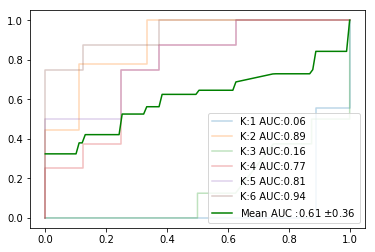

In [74]:
svc = SVC(probability=True)
num = 1
aucs = []

fprs = np.linspace(0,1,100)

tprs = []

for train,test in sKFold.split(X,y):
    X_train = X[train]
    y_train = y[train]
    
    X_test = X[test]
    y_test = y[test]
    
    svc.fit(X_train,y_train)
    
    prob = svc.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_test,prob)
    
    tprs.append(interp(fprs,fpr,tpr))
    
    auc_ = auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,label = 'K:%d AUC:%0.2f'%(num,auc_),alpha = 0.3)
    num +=1
    
tprs = np.mean(tprs,axis = 0)

auc_mean = auc(fprs,tprs)

std = np.std(aucs)

plt.plot(fprs,tprs,label = 'Mean AUC :%0.2f $\pm$%0.2f'%(auc_mean,std),color = 'green')

print('SVC 平均的auc：%0.2f'%(np.mean(aucs)))   
plt.legend()